Justin Roderick

CAP 4630

HW 4&5

Apr 23, 2024

# Recurrent Neural Network Homework

This is the 4th assignment for CAP 4630 and we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 60 points, with extra 10 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement a RNN model to predict time series##
### 1.1 Prepare the data (10 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(2.5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(2.5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(2.5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2.5 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. Use **past 12** datapoints as input data X to predict the **next 1** datapoint as Y, which is the 'next token prediction'. The time window will be 12.
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the train and test data
train_data = np.genfromtxt("train.txt", delimiter=",", skip_header=1, usecols=1, dtype=np.float32)
test_data = np.genfromtxt("test.txt", delimiter=",", skip_header=1, usecols=1, dtype=np.float32)

# Function to generate train and test labels
def generate_labels(data):
    labels = data[12:]
    return np.array(labels)

train_labels = generate_labels(train_data)
test_labels = generate_labels(test_data)

# Normalize the train and test data with the MinMaxScaler
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()
test_data_normalized = scaler.transform(test_data.reshape(-1, 1)).flatten()

# Normalize the test labels using the same MinMaxScaler
test_labels_normalized = scaler.transform(test_labels.reshape(-1, 1)).flatten()

# Reshape train and test data for input to the model
def reshape_data(data):
    X = []
    for i in range(len(data) - 12):
        X.append(data[i:i + 12])
    return np.array(X)

trainX = reshape_data(train_data_normalized)
testX = reshape_data(test_data_normalized)

# Printing out the test data and labels
print("TEST data:")
print(testX)
print("TEST labels:")
print(test_labels_normalized)

TEST data:
[[1.0661157  1.1046832  0.8264463  0.70247936 0.5674931  0.64187324
  0.70523417 0.6556474  0.8319559  0.8044077  0.87052345 1.013774  ]
 [1.1046832  0.8264463  0.70247936 0.5674931  0.64187324 0.70523417
  0.6556474  0.8319559  0.8044077  0.87052345 1.013774   1.2231405 ]
 [0.8264463  0.70247936 0.5674931  0.64187324 0.70523417 0.6556474
  0.8319559  0.8044077  0.87052345 1.013774   1.2231405  1.2534435 ]
 [0.70247936 0.5674931  0.64187324 0.70523417 0.6556474  0.8319559
  0.8044077  0.87052345 1.013774   1.2231405  1.2534435  0.98898065]
 [0.5674931  0.64187324 0.70523417 0.6556474  0.8319559  0.8044077
  0.87052345 1.013774   1.2231405  1.2534435  0.98898065 0.8347107 ]
 [0.64187324 0.70523417 0.6556474  0.8319559  0.8044077  0.87052345
  1.013774   1.2231405  1.2534435  0.98898065 0.8347107  0.7107438 ]
 [0.70523417 0.6556474  0.8319559  0.8044077  0.87052345 1.013774
  1.2231405  1.2534435  0.98898065 0.8347107  0.7107438  0.8292011 ]
 [0.6556474  0.8319559  0.8044077  

### 1.2 - Build the RNN model (20 Points) ##


Build a RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer and 1 Linear layer, with RNN's hidden size to be 4.  **(10 Points)**
2. Initialize model, optimizer and criterion. **(5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10** and **print out the average traning loss for every 100 epochs**. **(5 Points)**

**Hints:**  
1. You can use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [41]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through the model
        out, _ = self.rnn(x)
        # Extract the last output from the RNN sequence
        out = self.linear(out[:, -1, :])
        return out

# Set up model, optimizer, and criterion
input_size = 1
hidden_size = 4
output_size = 1

# Initialize the RNN model, optimizer, and loss
model = RNNModel(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

epochs = 1000
batch_size = 10
num_batches = len(trainX) // batch_size

# Training loop
for epoch in range(epochs):
    epoch_loss = 0.0
    # Iterate over the training data in batches
    for i in range(0, len(trainX), batch_size):
        optimizer.zero_grad()
        batch_X = trainX_tensor[i:i+batch_size]
        batch_Y = trainY_tensor[i:i+batch_size]
        output = model(batch_X.unsqueeze(2))
        loss = criterion(output, batch_Y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Print average training loss for every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss / num_batches}")

Epoch [100/1000], Loss: 66495.8130859375
Epoch [200/1000], Loss: 54609.3921875
Epoch [300/1000], Loss: 44494.53955078125
Epoch [400/1000], Loss: 35917.11215820313
Epoch [500/1000], Loss: 28748.352117919923
Epoch [600/1000], Loss: 22892.981866455077
Epoch [700/1000], Loss: 18257.83370361328
Epoch [800/1000], Loss: 14734.120852661134
Epoch [900/1000], Loss: 12187.208026123048
Epoch [1000/1000], Loss: 10453.88246459961


### 1.3 Evaluate Predictive Model Performance (**Bonuse point 10 Points**)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Make prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Denormalize the prediction results back to original scale with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. The plot for validation is shown below (observation test data are blue and prediction results are orange):
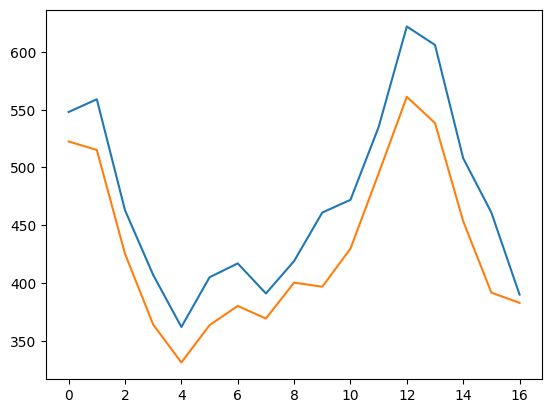

<span style="color:magenta">
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


Root Mean Squared Error (RMSE) for TRAIN: 76254.90625
Root Mean Squared Error (RMSE) for TEST: 76031.78125


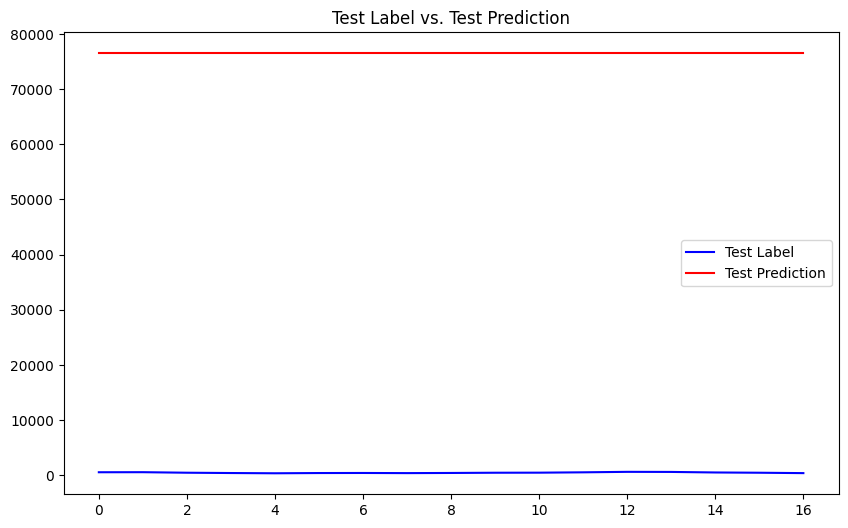

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Make prediction on train and test datapoints
with torch.no_grad():
    train_predictions = model(torch.tensor(train_X, dtype=torch.float32).unsqueeze(2)).squeeze().numpy()
    test_predictions = model(torch.tensor(test_X, dtype=torch.float32).unsqueeze(2)).squeeze().numpy()

# Denormalize the prediction results back to original scale
train_predictions_denorm = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
test_predictions_denorm = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Calculate root mean squared error (RMSE) for train and test
train_rmse = mean_squared_error(train_data[12:], train_predictions_denorm, squared=False)
test_rmse = mean_squared_error(test_data[12:], test_predictions_denorm, squared=False)
print(f"Root Mean Squared Error (RMSE) for TRAIN: {train_rmse}")
print(f"Root Mean Squared Error (RMSE) for TEST: {test_rmse}")

# Plot the test label and prediction
plt.figure(figsize=(10, 6))
plt.plot(test_data[12:], label='Test Label', color='blue')
plt.plot(test_predictions_denorm, label='Test Prediction', color='red')
plt.title('Test Label vs. Test Prediction')
plt.legend()
plt.show()

## 2 - Use LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (10 Points) ###
Conduct sentiment analysis using IMDB data with reccurent neural network. Make prediction on sentiment (positive/negative) as a binary classification.
More details can be found here, https://keras.io/api/datasets/imdb/

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(5 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(5 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here, max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.

**Note:**\
We train the build LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [44]:
import torch
import random
import numpy as np

from keras.preprocessing import sequence
from keras.datasets import imdb

# Load IMDB dataset from keras
max_features = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Print the legth of the sequences
print("Length of sequences in x_train:")
print([len(seq) for seq in x_train])
print("Length of sequences in x_test:")
print([len(seq) for seq in x_test])

# Preprocess the sequences with padding
maxlen = 100
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Combine data so LSTM model is trained with all data
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Define validation set as the test set
x_val = x_test
y_val = y_test

17464789/17464789 [==============================] - 1s 0us/step
Length of sequences in x_train:
[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128,

### 2.2 - Design and train LSTM model (20 Points) ###

Build a LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(10 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
7. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score

# Complete LSTM model architecture
class LSTMClassifier(nn.Module):
  def __init__(self, max_features, embedding_dim, hidden_dim):
    super(LSTMClassifier, self).__init__()
    self.embeddings = nn.Embedding(max_features, embedding_dim)
    # LSTM layer
    self.lstm = nn.LSTM(embedding_dim, hidden_dim)
    # Fully connected layer
    self.fc = nn.Linear(hidden_dim, 1)

  def forward(self, sentence):
    # Pass input sentence through embedding layer
    embedded = self.embeddings(sentence)
    lstm_out, _ = self.lstm(embedded)
    # Take the output of the last LSTM sequence
    logits = self.fc(lstm_out[:, -1, :])
    return torch.sigmoid(logits)

# Create an instance of LSTM model, an adam optimizer and BCE loss
max_features = 1000
embedding_dim = 8
hidden_dim = 8

# Initialize the model
model = LSTMClassifier(max_features, embedding_dim, hidden_dim)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

# Train the model, print out the loss
x_train_tensor = torch.LongTensor(x_combined)
y_train_tensor = torch.FloatTensor(y_combined)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train the model
num_epochs = 10
best_val_accuracy = 0.0

for epoch in range(0, num_epochs):
    model.train()
    epoch_loss = 0.0
    epoch_predictions = []
    epoch_targets = []

    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        # Forward pass
        output = model(batch_x)
        loss = criterion(output.squeeze(), batch_y)
        # Backward pass
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        predictions = (output > 0.5).float()
        epoch_predictions.extend(predictions.squeeze().tolist())
        epoch_targets.extend(batch_y.tolist())

    # Calculate training accuracy
    train_accuracy = accuracy_score(epoch_targets, epoch_predictions)

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        val_inputs = torch.LongTensor(x_val)
        val_targets = torch.FloatTensor(y_val)
        val_output = model(val_inputs)
        val_predictions = (val_output > 0.5).float()
        val_accuracy = accuracy_score(val_targets.tolist(), val_predictions.squeeze().tolist())


    print(f"Epoch {epoch}, Training Loss: {epoch_loss / len(train_loader):.6f}, Training Accuracy: {train_accuracy:.6f}, Validation Accuracy: {val_accuracy:.6f}")

    # Update best accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy

# Print out the best validation accuracy
print(f"Best Validation Accuracy: {best_val_accuracy:.6f}")

Epoch 0, Training Loss: 0.691775, Training Accuracy: 0.522740, Validation Accuracy: 0.533120
Epoch 1, Training Loss: 0.687033, Training Accuracy: 0.538060, Validation Accuracy: 0.547640
Epoch 2, Training Loss: 0.680934, Training Accuracy: 0.554400, Validation Accuracy: 0.553000
Epoch 3, Training Loss: 0.674917, Training Accuracy: 0.564060, Validation Accuracy: 0.562880
Epoch 4, Training Loss: 0.669914, Training Accuracy: 0.568620, Validation Accuracy: 0.575640
Epoch 5, Training Loss: 0.665527, Training Accuracy: 0.572700, Validation Accuracy: 0.580320
Epoch 6, Training Loss: 0.663117, Training Accuracy: 0.576440, Validation Accuracy: 0.582520
Epoch 7, Training Loss: 0.660692, Training Accuracy: 0.578660, Validation Accuracy: 0.584040
Epoch 8, Training Loss: 0.658861, Training Accuracy: 0.580700, Validation Accuracy: 0.584520
Epoch 9, Training Loss: 0.657803, Training Accuracy: 0.581420, Validation Accuracy: 0.586240
Best Validation Accuracy: 0.586240


# Reinforcement Learning

This is the 5th assignment for CAP 4630 and we will train an AI-based explorer to play a game by reinforcement learing. As domestrated below, in this game, the treasure (denoted by T) is on the right-most and the explorer (denoted by o) will learn to get the treasure by moving left and right. The explorer will be rewarded when it gets the treasure.  After serveral epoches, the explorer will learn how to get the treasure faster and finally it will go to the treasure by moving to right directly. \

You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 60 points, with extra 10 bonus points)** \

Episode 1, Step1: o----T   \
... \
Episode 1, Step6: ---o-T   \
... \
Episode 1, Step10: -o---T \
... \
Episode 1, Step15: ----oT (finished) \

You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)**. Additionally, you have the opportunity to earn **(extra bonus 10 points)** for extra challenges. \

**Task Overview:**
- Train the explorer getting the treasure quickly through Q-learning method

## 1 Achieve Q-learning method ##
### 1.1 Model Preparation **(5 Points)**

Import useful packages and prepare hyperpaprameters for Q-learning methods.

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the library "time"
4. Set the parameter as suggested

**Hints:**
1. For your first trial, you may set as it is
2. You may explore other possibilities here when you complete the whole homework

In [46]:
import numpy as np
import pandas as pd

N_STATES = 6   # the width of 1-dim world
ACTIONS = ['left', 'right']     # the available actions to use
EPSILON = 0.9   # the degree of greedy (0＜ε＜1)
ALPHA = 0.1     # learning rate (0＜α≤1)
GAMMA = 0.9    # discount factor (0＜γ＜1)
MAX_EPOCHES = 13   # the max epoches
FRESH_TIME = 0.3    # the interval time

### 1.2 Q table **(5 Points)**

Q table is a [states * actions] matrix, which stores Q-value of taking one action in that specific state. For example, the following Q table means in state s3, it is more likely to choose a1 because it's Q-value is 5.31 which is higher than Q-value 2.33 for a0 in s3(refer to Lecture slides 16, page 35).
![](https://drive.google.com/uc?export=view&id=1WGh7NYyYw6ccrxbDVdfbJmb_IhBfUyFf)

**Tasks:**
1. define the build_q_table function
2. **Print Out** defined Q-table. The correct print information should be:

|     | left | right |
|-----|------|-------|
| 0   | 0.0  | 0.0   |
| 1   | 0.0  | 0.0   |
| 2   | 0.0  | 0.0   |
| 3   | 0.0  | 0.0   |
| 4   | 0.0  | 0.0   |
| 5   | 0.0  | 0.0   |


    

**Hints:**
1. Using pd.DataFrame to define the Q-table.(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
2. Initialize the Q-table with all zeros.

In [47]:
# Function to build q table
def build_q_table(n_states, actions):
    # Initialize the q table with zeros
    q_table = pd.DataFrame(np.zeros((n_states, len(actions))), columns=actions)
    return q_table

q_table = build_q_table(N_STATES, ACTIONS)
print(q_table)

   left  right
0   0.0    0.0
1   0.0    0.0
2   0.0    0.0
3   0.0    0.0
4   0.0    0.0
5   0.0    0.0


### 1.3 Define action **(10 Points)**

In this section, we are going to define how an actor picks the actions. We introduce ε-greedy (In lecture slide 16, page 35). In the initial exploring stage, the explorer knows little about the environment. Therefore, it is better to explore randomly instead of greedy. ε-greedy is the value to control the degree of greedy. It can be changed with time lapsing. In this homework, we set it as fixed value EPSILON = 0.9. You can change it to explore the final effect.

**Tasks:**
1. define the choose_action function
2. **Print Out** sample action. The sampled action should be "left" or "right".

**Hints:**
1. You need to define two cases: 1) non-greedy (i.e., random); 2) greedy.
2. Non-greedy should occupy (1-ε) senario while greedy should occupy ε senario. In this case, it means Non-greedy occupys 10% senario while greedy occupys 90% senario. (you could implement it by comparing a random number ranging from 0 to 1 with ε. **Numpy provides a function capable of generating a random number from a uniform distribution.**)
3. In the non-greedy pattern, the actor should choose the actions randomly.
4. In the greedy pattern, the actor should choose the higher Q-value action.
5. Don't forget the initial state which means all Q-value are zero and actor cannot choose greedily. You can treat it as non-greedy pattern.

In [48]:
# Choose action function based on current state
def choose_action(state, q_table):
  actions = q_table.columns

  if((np.sum(q_table.loc[state, :]) == 0) or (np.random.uniform() >= EPSILON)):
    action_name = np.random.choice(actions)
  else:
    action_name = q_table.loc[state, :].idxmax()

  return action_name

sample_action = choose_action(0, q_table)
print(sample_action)

left


### 1.4 Interact with the environment **(20 Points)**

In this section, we need to give a feedback for our previous action, which means getting reward (R) for next state (S_next) based on current state (S_current) and action (A). In this problem, we get reward R=1 if we move to the treasure T spot, otherwise, we get R=0.

**Tasks:**
1. define get_env_feedback function
**Hints:**
1. This function contains two parameters S_current and A(ction), and return S_next and R(eward).
2. You need to consider two different senarios: 1) A = right; 2) A = left.
3. In the above two senarios, you need to consider the boundary, next state and rewards.
4. The update_env function is given to show changes for different steps in different episodes.
5. The validation for S_current and Action is shown below.

- S_current=0, sample_action = 'right', sample_feedback=(1,0)
- S_current=3, sample_action = 'right', sample_feedback=(4,0)
- S_current=4, sample_action = 'right', sample_feedback=('terminal', 1)
- S_current=0, sample_action = 'left', sample_feedback=(0,0)
- S_current=3, sample_action = 'left', sample_feedback=(2,0)
- S_current=4, sample_action = 'left', sample_feedback=(3, 0)

In [51]:
def get_env_feedback(S_current, A):
  # Move right
  if A == 'right':
    if S_current == N_STATES - 2:  # If the explorer reaches the treasure
      S_next = 'terminal'
      R = 1
    # Move right
    else:
      S_next = S_current + 1
      R = 0
  # move left
  else:
    if S_current == 0:  # If the explorer is at the leftmost boundary
      S_next = S_current
      R = 0
    # Move left
    else:
      S_next = S_current - 1
      R = 0

  return S_next, R

sample_action = 'left'
S_current = 4
sample_feedback = get_env_feedback(S_current, sample_action)
print(sample_feedback)

(3, 0)


In [52]:
import time

def update_env(S, episode, step_counter):
  env_list = ['-']*(N_STATES-1) + ['T']
  # Check if the episode has terminated
  if S == 'terminal':
    interaction = '  Episode %s: total_steps = %s' % (episode+1, step_counter)
    print('{}\n'.format(interaction), end='')
    time.sleep(2)
  # Update list
  else:
    env_list[S] = 'o'
    interaction = ''.join(env_list)
    print('\r{}'.format(interaction), end='')
    time.sleep(FRESH_TIME)

### 1.5 Start Q-learning with defined functions **(20 Points)**

In this section, we are going to utilize all the functions defined above to do q-learning based on the optimal policy.
![](https://drive.google.com/uc?export=view&id=10ra6mLlBHlhGNTYWwdGANoa6lC1K_7at)

**Tasks**:
1. define reinforce_learning function

**Hints**:
1. You should write this function with loops to keep updating q-table until you get to the reward spot.
2. We have two loops, one is for different episodes and another one is for steps
3. Whenever we take a step to the reward spot, we should end the loop and start another episode.
4. Here is one possible example.

![](https://drive.google.com/uc?export=view&id=1oo-gk710XVXbbeI7AI0uZInrnKtqGqn7)

In [ ]:
def reinforce_learning():
  # Build Q-Table
  q_table = build_q_table(N_STATES, ACTIONS)

  for episode in range(MAX_EPOCHES):
    step_counter = 0
    S_current = 0
    is_terminated = False
    update_env(S_current, episode, step_counter)

    while not is_terminated:
      # Choose action
      action = choose_action(S_current, q_table)

      # Take action & get next state
      S_next, R = get_env_feedback(S_current, action)

      # Update Q-table
      # If the explorer doesn't reach the treasure
      if S_next != 'terminal':
        q_target = R + 0.9 * q_table.loc[S_next].max()
      # If the explorer reaches the treasure
      else:
        q_target = R
        is_terminated = True

      q_table.loc[S_current, action] += 0.1 * (q_target - q_table.loc[S_current, action])

      S_current = S_next

      # Update environment
      update_env(S_current, episode, step_counter + 1)
      step_counter += 1

  return q_table

In [ ]:
# Main function
if __name__ == "__main__":
  q_table = reinforce_learning()
  print('\r\nQ-table:\n')
  print(q_table)

----oT  Episode 1: total_steps = 86
----oT  Episode 2: total_steps = 12
----oT  Episode 3: total_steps = 18
----oT  Episode 4: total_steps = 7
----oT  Episode 5: total_steps = 5
----oT  Episode 6: total_steps = 5
----oT  Episode 7: total_steps = 5
----oT  Episode 8: total_steps = 5
----oT  Episode 9: total_steps = 7
----oT  Episode 10: total_steps = 5
----oT  Episode 11: total_steps = 5
----oT  Episode 12: total_steps = 7
----oT  Episode 13: total_steps = 5

Q-table:

       left     right
0  0.000000  0.006413
1  0.000321  0.030648
2  0.000000  0.122807
3  0.004385  0.348415
4  0.004236  0.745813
5  0.000000  0.000000


### Bonus Question: Exploring the Impact of Learning Rate and Discount Factor (**10 Bonus Points**)

Dive into the dynamics of reinforcement learning by experimenting with two specific configurations of the learning rate (ALPHA α) and discount factor (GAMMA γ). This focused inquiry will shed light on how different emphases on learning speed versus future reward considerations affect an agent's strategy and efficiency.

**Your Experimental Setups:**
1. **Low Learning Rate, High Discount Factor** (α = 0.1, γ = 0.9): This setting emphasizes cautious learning with a strong consideration for future rewards.
2. **High Learning Rate, Low Discount Factor** (α = 0.9, γ = 0.1): Here, the focus shifts to rapid learning with an emphasis on immediate rewards.

---

#### Task 1: Plotting Steps to Success Over Episodes

**Objective:**  
Create a line graph to visualize the number of steps the agent takes to reach the goal across episodes for two different sets of Q-learning parameters.

**Instructions:**  
1. **Gather Data:** Record the number of steps required for the agent to reach the goal in each episode. Do this for both parameter configurations: α=0.1, γ=0.9 and α=0.9, γ=0.1.
2. **Prepare the Chart:**
   - Label the x-axis as "Episodes" and the y-axis as "Steps to Reach Goal".
   - Choose a plotting tool (e.g., Excel, Google Sheets, Matplotlib, Seaborn).
3. **Plot Lines:**
   - Draw a line for each parameter set (α=0.1, γ=0.9 and α=0.9, γ=0.1), using different colors or styles to distinguish them.
   - Add a legend to identify the lines according to the parameter settings.

**Expected Analysis:**  
Discuss how the number of steps to reach the goal changes over episodes for each parameter setting. Consider what this suggests about the efficiency of learning and adaptation strategies. Note differences in learning speed and consistency.

---

#### Task 2: Analyzing Cumulative Reward Patterns

**Objective:**  
Construct a line graph to illustrate the cumulative reward the agent accumulates over episodes under two different parameter settings: α=0.1, γ=0.9 and α=0.9, γ=0.1.

**Instructions:**  
1. **Gather Data:** Calculate the cumulative reward that the agent earns from the start to the success in each episode. Track this for both parameter configurations: α=0.1, γ=0.9 and α=0.9, γ=0.1.
2. **Prepare the Chart:**
   - Label the x-axis as "Episodes" and the y-axis as "Cumulative Reward".
   - Choose a plotting tool (e.g., Excel, Google Sheets, Matplotlib, Seaborn).
3. **Plot Lines:**
   - Plot a separate line for each parameter configuration, using distinct colors or line styles.
   - Clearly label or add a legend to distinguish between the parameter settings.

**Expected Analysis:**  
Evaluate the patterns in cumulative rewards over episodes for each set of parameters. Discuss the implications of these patterns for the agent's learning process and its ability to maximize rewards. Highlight any notable differences in reward accumulation and learning outcomes between the two parameter sets.


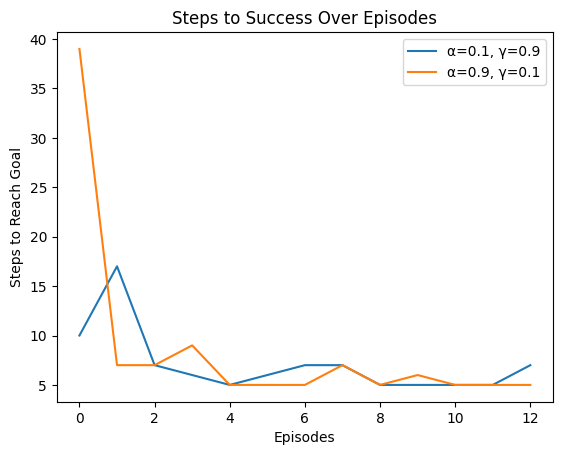

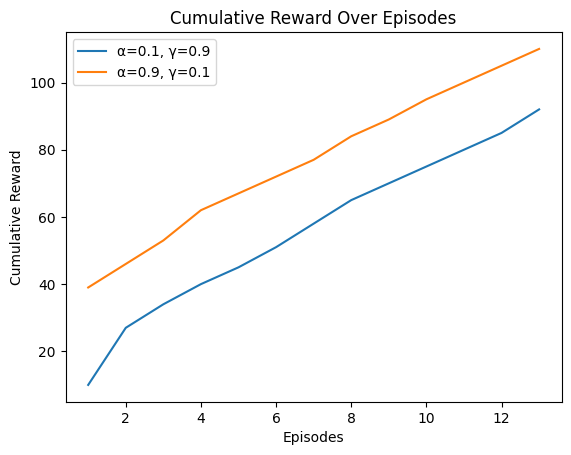

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bonus_reinforce_learning(alpha, gamma):
    # Build Q-table
    q_table = build_q_table(N_STATES, ACTIONS)

    steps_to_goal = []
    cumulative_rewards = []

    # Start training loop
    for episode in range(MAX_EPOCHES):
        step_counter = 0
        S_current = 0
        is_terminated = False

        while not is_terminated:
            # Choose an action
            action = choose_action(S_current, q_table)

            # Take action & get next state
            S_next, R = get_env_feedback(S_current, action)

            # Update Q-table
            if S_next != 'terminal':
                q_target = R + gamma * q_table.loc[S_next].max()
            else:
                q_target = R
                is_terminated = True

            q_table.loc[S_current, action] += alpha * (q_target - q_table.loc[S_current, action])

            # Move to next state
            S_current = S_next

            # Increment step
            step_counter += 1

        # Store number of steps to reach goal and cumulative reward for this episode
        steps_to_goal.append(step_counter)
        cumulative_rewards.append(sum(steps_to_goal))

    return steps_to_goal, cumulative_rewards



# Plotting Steps to Success Over Episodes
def plot_steps_to_success(steps_set1, steps_set2):
    episodes = range(MAX_EPOCHES)

    plt.plot(episodes, steps_set1, label='α=0.1, γ=0.9')
    plt.plot(episodes, steps_set2, label='α=0.9, γ=0.1')

    plt.xlabel('Episodes')
    plt.ylabel('Steps to Reach Goal')
    plt.title('Steps to Success Over Episodes')
    plt.legend()
    plt.show()

# Analyzing Cumulative Reward Patterns
def plot_cumulative_rewards(rewards_set1, rewards_set2):
    episodes = range(1, MAX_EPOCHES + 1)

    plt.plot(episodes, rewards_set1, label='α=0.1, γ=0.9')
    plt.plot(episodes, rewards_set2, label='α=0.9, γ=0.1')

    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward Over Episodes')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Reinforcement Learning with α=0.1, γ=0.9
    steps_set1, rewards_set1 = bonus_reinforce_learning(alpha=0.1, gamma=0.9)

    # Reinforcement Learning with α=0.9, γ=0.1
    steps_set2, rewards_set2 = bonus_reinforce_learning(alpha=0.9, gamma=0.1)

    plot_steps_to_success(steps_set1, steps_set2)
    plot_cumulative_rewards(rewards_set1, rewards_set2)